<a href="https://colab.research.google.com/github/diwakarojha/Tensorflow_Keras/blob/main/4_Time_Series_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [3]:
def trend(time,slope=0):
  return slope * time

In [4]:
def seasonal_pattern(season_time):
  return np.where(season_time<0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))

In [9]:
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

In [5]:
def white_noise(time, noise_level=1, seed= None):
  rnd = np.random.RandomState(seed)
  return rnd.rand(len(time)) * noise_level 

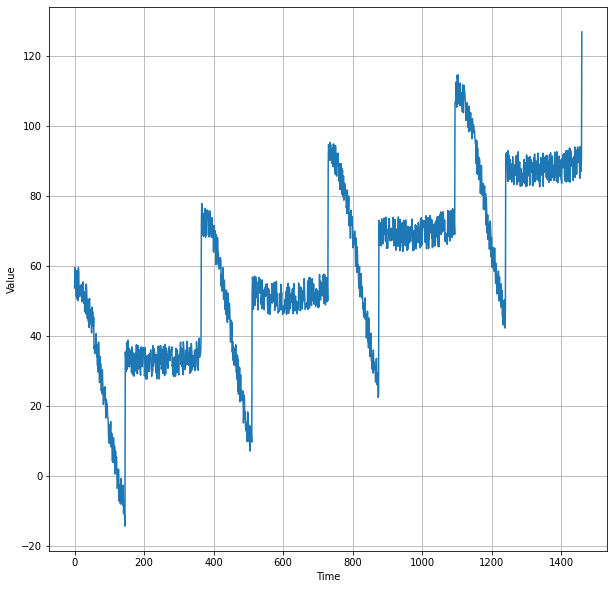

In [21]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40

series= baseline + trend(time,slope) + seasonality(time, period=365, amplitude=amplitude )

noise_level = 10
noise = white_noise(time, noise_level, seed= 42)

series += noise

plt.figure(figsize=(10,10))
plot_series(time, series)
plt.show()

In [20]:
series[:10]

array([53.74540119, 59.55121663, 57.39623545, 56.08325749, 51.66539862,
       51.6618722 , 50.66766892, 58.72171036, 56.0324482 , 57.0516324 ])